# Exercise sheet 7

**Please turn in your exercises by January 9th.**

# Exercise sheet 7

## Angel Ontiveros, Björn Plüster
## 09.01.2024

## Task 1: Covergence

Provide a good intuition why the convergence rate of the subgradient method is $O(1/\varepsilon^2)$.

**Answer:**
The subgradient method is used in functions that are non-smooth and thus non-differentiable.
This means that the gradient is not defined at all points of the function. instead we use the subgradient which may be a set of values instead of a single value. for example, for the absolute value function, the subgradient at $x = 0$ is the set of values $[-1,1]$.
 
This lack of information about a unique direction for the steepest descent makes the convergence rate slower for subgradient methods. The $O(1/\varepsilon^2)$ convergence rate means that the number of iterations needed to get within a distance of $\varepsilon$ from the optimal solution grows quadratically with $1/\varepsilon$.
 
In contrast, for gradient descent (used for differentiable functions), the convergence rate is typically faster, at $O(1/\varepsilon)$.


## Task 2: Gradient is sub-gradient

Prove the following lemma.

**Lemma**

If $f: \mathbb{R}^n\rightarrow \mathbb{R}$ is convex and differentiable, then $\forall x, \partial f(x) =\{\nabla f(x)\}$.

**Proof:**

Let's denote $g(x) = \nabla f(x)$, the gradient of $f$ at $x$.

By definition, a vector $v$ is a subgradient of $f$ at $x$ if for all $y$ in the domain of $f$, we have:

$f(y) \geq f(x) + v^T(y - x)$

Since $f$ is differentiable at $x$, the gradient $g(x)$ exists and by the definition of the gradient, for all $y$ we have:

$f(y) \geq f(x) + g(x)^T(y - x)$

So, $g(x)$ is a subgradient of $f$ at $x$, and hence $g(x) \in \partial f(x)$.

Now, we need to show that $g(x)$ is the only subgradient of $f$ at $x$, i.e., $\partial f(x) = \{g(x)\}$.

Suppose there exists another subgradient $v \neq g(x)$, i.e., $v \in \partial f(x)$ and $v \neq g(x)$. Then, by the definition of the subgradient, for all $y$ we have:

$f(y) \geq f(x) + v^T(y - x)$

Subtracting the inequality $f(y) \geq f(x) + g(x)^T(y - x)$ from the above, we get:

$0 \geq (v - g(x))^T(y - x)$

Since this must hold for all $y$, let's choose $y = x + \alpha(v - g(x))$ for some $\alpha > 0$. Substituting $y$ gives:

$0 \geq \alpha(v - g(x))^T(v - g(x)) = \alpha\|v - g(x)\|^2$

Since $\alpha > 0$, we must have $\|v - g(x)\|^2 = 0$, which implies $v = g(x)$.

Therefore, we have shown that if $v \in \partial f(x)$, then $v = g(x)$, i.e., $\partial f(x) = \{g(x)\} \square$. 

## Task 3: Convexity

Prove the following lemma.

**Lemma**

A function $f: D \rightarrow \mathbb{R}$, $D \subseteq \mathbb{R}^d$ is convex if and only if $D$ is convex and $\forall x \in D$, $\partial f(x) \neq \emptyset$.

**Proof:**

1. ($\Rightarrow$) Suppose $f$ is convex. By definition, the domain $D$ of a convex function is convex. Also, for a convex function, the subdifferential at any point is non-empty. This is because, by definition, the subdifferential of a function at a point is the set of all subgradients at that point, and a convex function always has at least one subgradient at any point in its domain. Therefore, if $f$ is convex, then $D$ is convex and $\forall x \in D$, $\partial f(x) \neq \emptyset$.

2. ($\Leftarrow$) Suppose $D$ is convex and $\forall x \in D$, $\partial f(x) \neq \emptyset$. We need to show that $f$ is convex. By definition, a function is convex if and only if for any $x, y \in D$ and any $t \in [0, 1]$, we have $f(tx + (1-t)y) \leq tf(x) + (1-t)f(y)$. 

   Let $x, y \in D$ and $t \in [0, 1]$. Since $\partial f(x) \neq \emptyset$ and $\partial f(y) \neq \emptyset$, there exist $v \in \partial f(x)$ and $w \in \partial f(y)$. By the definition of the subgradient, we have $f(y) \geq f(x) + v^T(y - x)$ and $f(x) \geq f(y) + w^T(x - y)$. 

   Multiplying the first inequality by $t$ and the second by $(1-t)$ and adding them together, we get $tf(y) + (1-t)f(x) \geq f(tx + (1-t)y) + t v^T(y - x) + (1-t) w^T(x - y)$. 

   Since $v^T(y - x) \leq 0$ and $w^T(x - y) \leq 0$, we have $tf(y) + (1-t)f(x) \geq f(tx + (1-t)y)$, which shows that $f$ is convex.

Therefore, we have shown that a function $f: D \rightarrow \mathbb{R}$, $D \subseteq \mathbb{R}^d$ is convex if and only if $D$ is convex and $\forall x \in D$, $\partial f(x) \neq \emptyset$. $\square$

## Task 4: Smoothing

You can write many convex, not necessarily differentiable function as
$$
f(x) = \max_{i} f_i(x), \quad 1\leq i\leq k
$$
for $k$ convex, differentiable functions $f_i$. One can "smooth" function $f$ by replacing $\max$ with a realsoftmax/logsumexp, i.e.,
$$
g(x) = \frac{1}{M}\log\left(\sum_{i=1}^n \exp(M\cdot f_i(x))\right)
$$
for a fixed parameter $M > 0$. The parameter $M$ controls how close $g$ is to $f$, i.e., how "smooth" the approximation $g$ is.

Such a smoothing is a general way of turning any non-differentiable convex function into a differentiable function. If one does this, one can run Nesterov's gradient method on the resulting smooth function and it will take $O(1/\varepsilon)$ many iterations to reach an absolute error of $\varepsilon$ even on functions that are not necessarily strongly convex. Doesn't such an approach violate the lower bound of $O(1/\varepsilon^2)$ for non-differentiable convex functions that are not necessarily strongly convex?

**Answer:**

this approach does not violate the lower bound of $O(1/\varepsilon^2)$ for non-differentiable convex functions. The reason is that the lower bound applies to the original non-differentiable function, not to the smoothed version of the function. The smoothing operation makes the function differentiable, and therefore, it is no longer subject to the lower bound for non-differentiable functions. Instead, it is subject to the faster convergence rate of $O(1/\varepsilon)$ that applies to differentiable functions. In summary, it doesn't violate the lower bound since the smoothed function is not the same as the original one.

smoothing introduces a trade-off, while you gain in terms of convergence speed, there's a potential loss in accuracy regarding how closely the smoothed function represents the original function. The choice of  $M$ is crucial here; a higher M makes the approximation closer but might reduce the smoothing benefits.

## Utilities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def contour_map(f, xb=(-1,1), yb=(-1,1), ax=None):
    if ax is None:
        ax = plt
    (nx, ny) = (45, 45)
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    X = np.block([ [xv.reshape(1, -1)], [yv.reshape(1, -1)] ]).T
    zv = np.fromiter((f(x) for x in X), dtype=np.double)
    zv = zv.reshape(nx,ny)
    ax.contour(xv, yv, zv, 15)

def surface_plot(f, xb=(-1,1), yb=(-1,1)):
    (nx, ny) = (45, 45)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(*xb, nx)
    y = np.linspace(*yb, ny)
    xv, yv = np.meshgrid(x, y)
    X = np.block([ [xv.reshape(1, -1)], [yv.reshape(1, -1)] ]).T
    zv = np.fromiter((f(x) for x in X), dtype=np.double)
    zv = zv.reshape(nx,ny)
    ax.plot_surface(xv, yv, zv, cmap=cm.coolwarm)
    return fig, ax

## Task 5: Smoothing plots

Using the idea from **Task 4**, plot the "smooth" approximation of the following functions. 


### ReLU

Plot an approximation from Task 4 for the function
$$
\text{ReLU}(x) = \max(x, 0)
$$
for different values of $M$. 


In [44]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

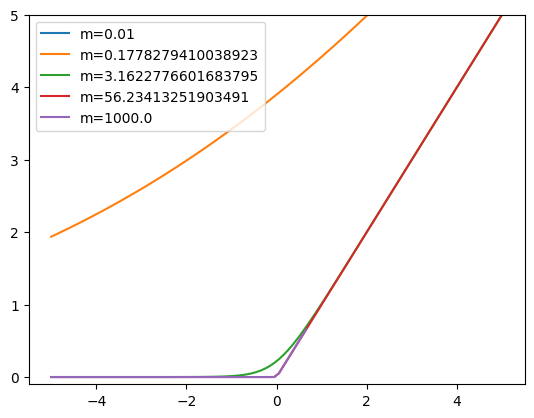

In [45]:
M = np.logspace(-2, 3, 5)

def smooth_relu(x, smoothness=1):
    m = smoothness
    return 1/m * np.log(1 + np.exp(x*m))

# surface plot for smooth relu
xs = np.linspace(-5, 5, 100)
for m in M:
    ys = np.array([smooth_relu(x, smoothness=m) for x in xs])
    plt.plot(xs, ys, label=f'm={m}')
plt.ylim(-0.1, 5)
plt.legend()

Text(0.5, 1.0, 'Error of smooth relu')

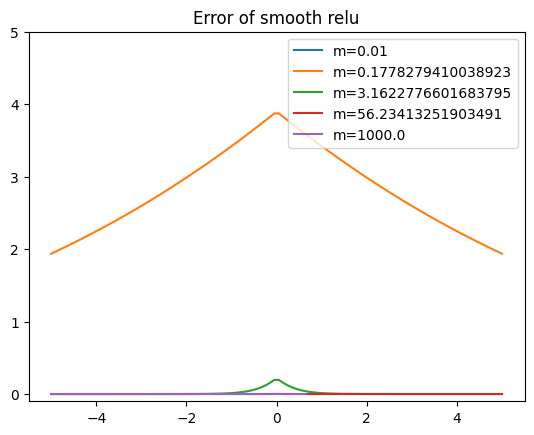

In [46]:
xs = np.linspace(-5, 5, 100)
for m in M:
    ys = np.array([smooth_relu(x, smoothness=m)-np.max([0, x]) for x in xs])
    plt.plot(xs, ys, label=f'm={m}')
plt.ylim(-0.1, 5)
plt.legend()
plt.title('Error of smooth relu')

### Absolute value

Plot an approximation from Task 4 for the function
$$
\text{abs}(x) = |x|
$$
for different values of $M$.

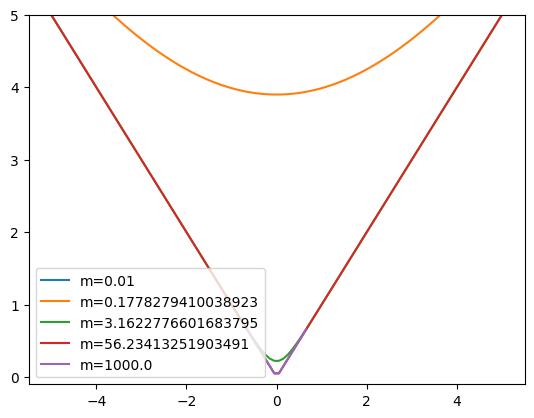

In [47]:
M = np.logspace(-2, 3, 5)

def smooth_abs(x, smoothness=1):
    m = smoothness
    return 1/m * np.log(np.exp(m*x) + np.exp(-m*x))

# surface plot for smooth abs
xs = np.linspace(-5, 5, 100)
for m in M:
    ys = np.array([smooth_abs(x, smoothness=m) for x in xs])
    plt.plot(xs, ys, label=f'm={m}')
plt.ylim(-0.1, 5)
plt.legend()

## Task 6: Sub-gradient method

Implement the sub-gradient method.
* `x0` is the initial point.
* `f` is the function you are trying to minimize.
* `g` is the subgradient of `f`.

Function `subgradient_path` should return a list of vectors on the path to the minimum.

In [48]:
def subgradient_path(x0, f, g, max_iter=100):
    x = x0
    xs = [x]
    best = x0
    for i in range(max_iter):
        # calculate optimal step size
        step_size = np.linalg.norm(x0 - best)/np.linalg.norm(g(x)*np.sqrt(max_iter+1))
        # at step 0 x0 == best, so step_size is 0 and we need to make a step
        if step_size == 0:
            step_size = 1e-3
        # keep track of best point
        if f(x) < f(best):
            best = x
        # make step
        x = x - step_size*g(x)
        xs.append(x)
    return np.array(xs)

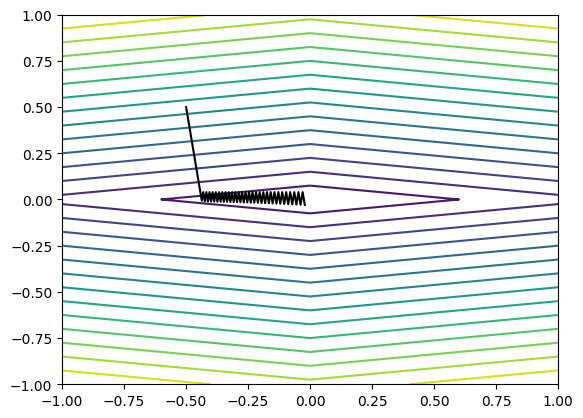

In [49]:
### example
f = lambda x: abs(x[0]) + abs(8*x[1])
g = lambda x: np.sign(x) * [1, 8]

x0 = np.array([-.5, .5])
xs = subgradient_path(x0, f, g)
xs = np.array(xs)

contour_map(f)
plt.plot(xs[:,0], xs[:,1], '-k')
plt.show()

### Robust regresssion

Finish the gradient of the function
$$
f(w) = \frac{1}{n}\left\|Xw - y\right\|_1
$$
run the sub-gradient method on it, and plot the function over time.

In [50]:
from sklearn.datasets import make_regression

def f(w):
    return np.linalg.norm(X @ w - y, 1) / len(X)

def g(w):
    return X.T @ np.sign(X @ w - y) / len(X)

X, y = make_regression(n_samples=1000, n_features=100, n_informative=40, random_state=0)
x0 = np.zeros(100)

values = subgradient_path(x0, f, g, max_iter=1000)
values = np.array(values)

In [51]:
values.shape

(1001, 100)

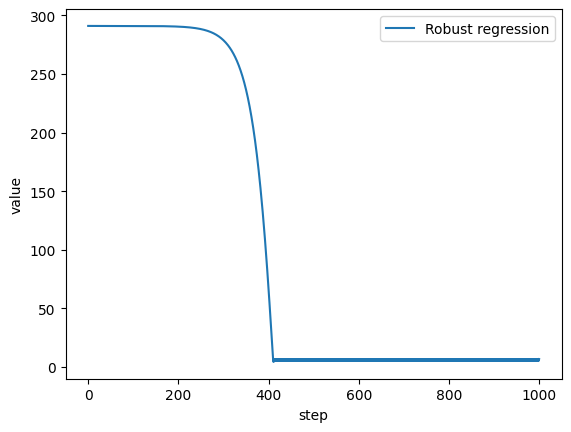

In [52]:
xs = np.arange(len(values))
ys = [f(x) for x in values]

plt.plot(xs, ys, label="Robust regression")

plt.ylabel("value")
plt.xlabel("step")
plt.legend()
plt.show()

### Linear regression with $\mathcal{l}_1$ regularization

Finish the gradient of the function
$$
f(w) = \frac{1}{n}\left\|Xw - y\right\|_2^2 + \|w\|_1,
$$
run the sub-gradient method on it, and plot the function over time.

In [53]:
from sklearn.datasets import make_regression

def f(w):
    return np.linalg.norm(X @ w - y) ** 2 / len(X) + np.linalg.norm(w, 1)

def g(w):
    return 2 * X.T @ (X @ w - y) / len(X) + np.sign(w)

X, y = make_regression(n_samples=1000, n_features=100, n_informative=40, random_state=0)
x0 = np.zeros(100)

values = subgradient_path(x0, f, g, max_iter=1000)
values = np.array(values)

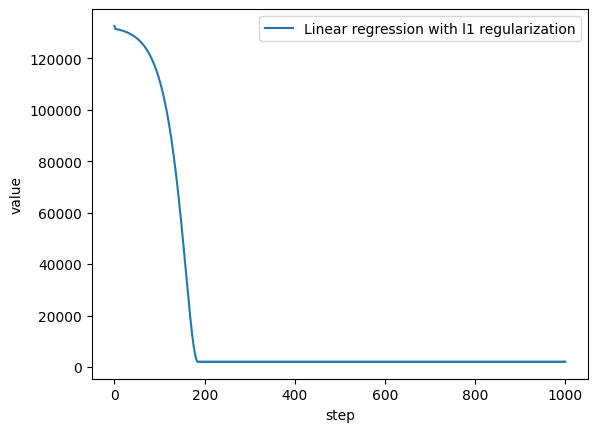

In [54]:
xs = np.arange(len(values))
ys = [f(x) for x in values]

plt.plot(xs, ys, label="Linear regression with l1 regularization")

plt.ylabel("value")
plt.xlabel("step")
plt.legend()
plt.show()

### Logistic regression with $\mathcal{l}_1$ regularization

Finish the gradient of the function
$$
f(w) = \frac{1}{n}\sum_{i=1}^n \log(1 + \exp(-y_i \cdot x_i^\top w)) + \|w\|_1
$$
run the sub-gradient method on it, and plot the function over time.

In [55]:
from sklearn.datasets import make_classification
from scipy.optimize import minimize

def f(w):
    return np.log(1. + np.exp(-y * X.dot(w))).mean() + np.linalg.norm(w, 1)

def g(w):
    sig = np.exp(-y * X.dot(w))
    return - X.T.dot(sig * y / (sig + 1.)) / X.shape[0] + np.sign(w)


X, y = make_classification(1000, 80, n_informative=40,
#                               n_redundant=0,
                               n_clusters_per_class=2, flip_y=0.1, random_state=0)

x0 = np.zeros(80)

values = subgradient_path(x0, f, g, max_iter=1000)
values = np.array(values)

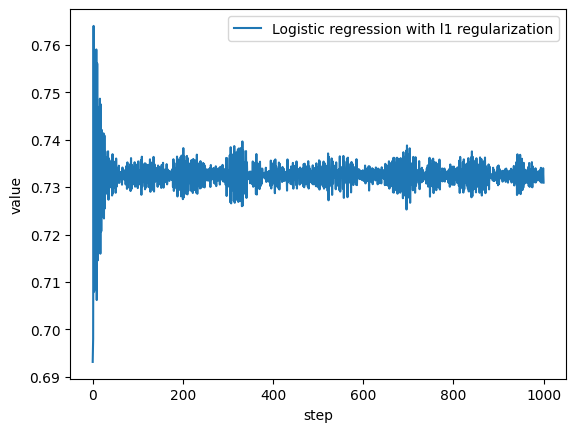

In [56]:
xs = np.arange(len(values))
ys = [f(x) for x in values]

plt.plot(xs, ys, label="Logistic regression with l1 regularization")

plt.ylabel("value")
plt.xlabel("step")
plt.legend()
plt.show()